In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import pickle
from causality.analysis.dataframe import CausalDataFrame
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Open the data from past notebooks and correct them to only include years that are common between the data structures (>1999).

In [4]:
with open('VariableData/money_data.pickle', 'rb') as f:
    income_data, housing_data, rent_data = pickle.load(f)
with open('VariableData/demographic_data.pickle', 'rb') as f:
    demographic_data = pickle.load(f)
with open('VariableData/endowment.pickle', 'rb') as f:
    endowment = pickle.load(f)
with open('VariableData/expander.pickle', 'rb') as f:
    expander = pickle.load(f)

In [5]:
endowment = endowment[endowment['FY'] > 1997].reset_index()
endowment.drop('index', axis=1, inplace=True)

demographic_data = demographic_data[demographic_data['year'] > 1999].reset_index()
demographic_data.drop('index', axis=1, inplace=True)

income_data = income_data[income_data['year'] > 1999].reset_index()
income_data.drop('index', axis=1, inplace=True)

housing_data = housing_data[housing_data['year'] > 1999].reset_index()
housing_data.drop('index', axis=1, inplace=True)

rent_data = rent_data[rent_data['year'] > 1999].reset_index()
rent_data.drop('index', axis=1, inplace=True)

Define a function to graph (and perform linear regression on) a given set of data.

In [6]:
def grapher(x, y, city, title, ytitle, xtitle, filename):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    fit = slope * x + intercept

    trace0 = go.Scatter(
                x = x,
                y = y,
                mode = 'markers',
                name=city,
                marker=go.Marker(color='#D2232A')
            )
    fit0 = go.Scatter(
                      x = x,
                      y = fit,
                      mode='lines',
                      marker=go.Marker(color='#AC1D23'),
                      name='Linear Fit'
                      )

    data = [trace0, fit0]

    layout = go.Layout(
                title = title,
                font = dict(family='Gotham', size=12),
                yaxis=dict(
                    title=ytitle
                ),
                xaxis=dict(
                    title=xtitle)
            )

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig, filename=filename)

Investigate the connection between the endowment's value and the Black population in Cambridge, controlling for rent and housing prices.

In [7]:
x = pd.to_numeric(endowment['Value ($B)']).as_matrix()
y = pd.to_numeric(demographic_data['c_black']).as_matrix()
z1 = pd.to_numeric(rent_data['cambridge']).as_matrix()
z2 = pd.to_numeric(housing_data['cambridge']).as_matrix()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

In [8]:
plt.rcParams['font.size'] = 11

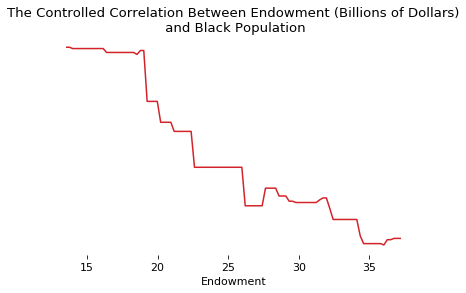

In [9]:
endow_black = grapher(x, y, "Cambridge", "The Correlation Between Endowment and Black Population", "Black Population of Cambridge", "Endowment ($B)", "endow_black")
causal_endow_black = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line', title='The Controlled Correlation Between Endowment (Billions of Dollars)\n and Black Population', color="#D2232A")
causal_endow_black.set(xlabel="Endowment", ylabel="Black Population of Cambridge")
fig = causal_endow_black.get_figure()
ax = plt.gca()
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.legend_.remove()
fig.savefig('images/black_endow.svg', format='svg', dpi=1200, bbox_inches='tight')

Investigate the connection between the endowment's value and the housing prices in Cambridge, controlling for growth of the population.

In [19]:
x = pd.to_numeric(endowment['Value ($B)']).as_matrix()
y = pd.to_numeric(housing_data['cambridge']).as_matrix()
z1 = pd.to_numeric(demographic_data['c_white']).as_matrix()
z2 = pd.to_numeric(demographic_data['c_poc']).as_matrix()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

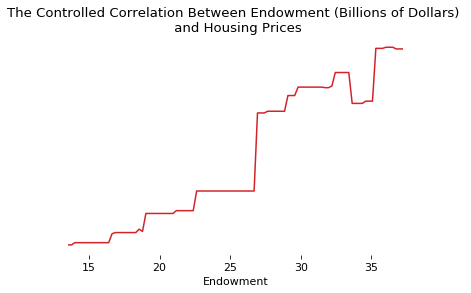

In [20]:
endow_housing = grapher(x, y, "Cambridge", "The Correlation Between Endowment and Housing Prices", "Housing Prices in Cambridge", "Endowment ($B)", "endow_housing")
causal_endow_housing = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line', title='The Controlled Correlation Between Endowment (Billions of Dollars) \n and Housing Prices', color="#D2232A")
causal_endow_housing.set(xlabel="Endowment", ylabel="Median Housing Prices in Cambridge ($)")
fig = causal_endow_housing.get_figure()
ax = plt.gca()
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.legend_.remove()
fig.savefig('images/housing_endow.svg', format='svg', dpi=1200, bbox_inches='tight')

Investigate the connection between the endowment's value and the rent prices in Cambridge, controlling for growth of the population.

In [12]:
x = pd.to_numeric(endowment['Value ($B)']).as_matrix()
y = pd.to_numeric(rent_data['cambridge']).as_matrix()
z1 = pd.to_numeric(demographic_data['c_white']).as_matrix()
z2 = pd.to_numeric(demographic_data['c_poc']).as_matrix()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

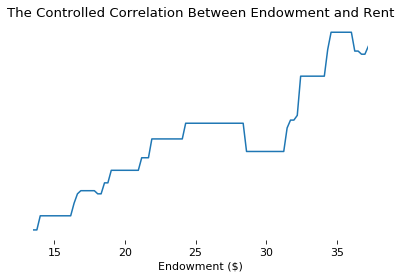

In [13]:
endow_rent = grapher(x, y, "Cambridge", "The Correlation Between Endowment and Rent", "Rent in Cambridge", "Endowment ($B)", "endow_rent")
causal_endow_rent = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line', title='The Controlled Correlation Between Endowment and Rent')
causal_endow_rent.set(xlabel="Endowment ($)", ylabel="Rent in Cambridge ($)")
fig = causal_endow_rent.get_figure()
ax = plt.gca()
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.legend_.remove()
fig.savefig('images/rent_endow.svg', format='svg', dpi=1200, bbox_inches='tight')

Investigate the connection between the amount Harvard pays the city of Cambridge per year (PILOT) and the rent prices in Cambridge, controlling for growth of the population.

In [14]:
x = pd.to_numeric(expander['Payments to City']).as_matrix()
y = pd.to_numeric(rent_data['cambridge']).as_matrix()
# Remove the last two elements of the other arrays – PILOT data is not sufficient otherwise.
y = y[:-2].copy()
z1 = pd.to_numeric(demographic_data['c_white']).as_matrix()
z1 = z1[:-2].copy()
z2 = pd.to_numeric(demographic_data['c_poc']).as_matrix()
z2 = z2[:-2].copy()
X  = CausalDataFrame({'x': x, 'y': y, 'z1': z1, 'z2': z2})

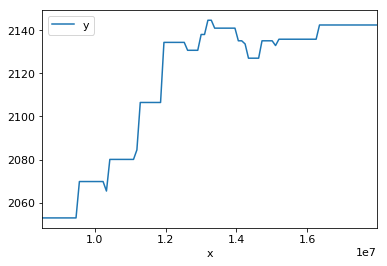

In [15]:
pilot_rent = grapher(x, y, "Cambridge", "The Correlation Between Harvard's PILOT and Rent", "Rent in Cambridge", "PILOT ($)", "pilot_rent")
causal_endow_rent = X.zplot(x='x', y='y', z=['z1', 'z2'], z_types={'z1': 'c', 'z2': 'c'}, kind='line')